In [62]:
#Ejercicio Splines

import numpy as np # Importo algebra Lineal
import matplotlib.pyplot as plt # Importo librería de gráficos 
import copy

In [63]:
#con esta funcion importo los datos de un txt, matriz 

z,T=np.loadtxt('Datosej5.txt',unpack=True) #Con unpack se da cuenta que tiene dos vectores distintos
conductividadtermica=0.01


In [64]:
z

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [65]:
T

array([70., 68., 55., 22., 13., 11., 10.])

Text(0, 0.5, 'T (ºC)')

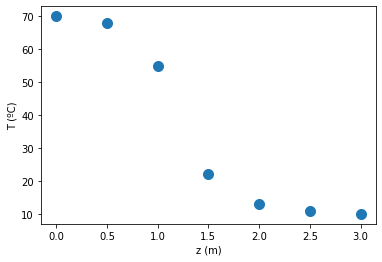

In [66]:
plt.plot(z,T,'o',ms=10) #ms es el tamaño del punto
plt.xlabel('z (m)')
plt.ylabel('T (ºC)')


In [67]:
#SPLINES
# Tengo n puntos, n-1 intervalos entonces voy a encontrar n-1 polinomios
#El ensamble de polinomios debe ser continuo,tener derivada primera y segunda continua
#Faltan 2 ecuaciones, eso sale dandole las condiciones de borde, por ejemplo que la segunda derivada en los extremos sea nula, 
# siempre las ecs de contorno tienen diferente forma


In [68]:
#y=H*b

h=[]
n=len(z)

for i in range (n-1):
    h.append(z[i+1]-z[i])   
h


    



[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [69]:
#Defino la matriz
    
matriz=np.zeros([n,n])
matriz[0,0]=1
matriz[n-1,n-1]=1
    

# Tambien puedo definir matriz[n-1,n-1]=np.eyes([n,n])
y=[]
y.append(0)


for i in range (1,n-1):
    matriz[i,i-1]=h[i-1]
    matriz[i,i]=2*(h[i]+h[i-1])
    matriz[i,i+1]=h[i]
    y.append(((T[i+1]-T[i])/h[i])-((T[i]-T[i-1])/h[i-1]))
    

y.append(0)
y=np.array(y)*3
print(matriz)
print('')
print(y)

[[1.  0.  0.  0.  0.  0.  0. ]
 [0.5 2.  0.5 0.  0.  0.  0. ]
 [0.  0.5 2.  0.5 0.  0.  0. ]
 [0.  0.  0.5 2.  0.5 0.  0. ]
 [0.  0.  0.  0.5 2.  0.5 0. ]
 [0.  0.  0.  0.  0.5 2.  0.5]
 [0.  0.  0.  0.  0.  0.  1. ]]

[   0.  -66. -120.  144.   42.    6.    0.]


In [70]:
b=np.linalg.solve(matriz,y)
print(b)

[  0.         -13.01538462 -79.93846154  92.76923077  -3.13846154
   3.78461538   0.        ]


In [71]:
#Ahora voy a calcular los coeficientes de los polinomios

In [72]:
n=len(b)

a=[]
c=[]
d=T

for i in range(1,n):
    a.append((1/3)*(b[i]-b[i-1])/h[i-1])
    c.append(((T[i]-T[i-1])/h[i-1])-b[i-1]*h[i-1]-a[i-1]*h[i-1]**2)

b=b[0:6]
d=d[0:6]
a=np.array(a)
b=np.array(b)
c=np.array(c)
d=np.array(T)

print(a)
print(b)
print(c)
print(d)






[ -8.67692308 -44.61538462 115.13846154 -63.93846154   4.61538462
  -2.52307692]
[  0.         -13.01538462 -79.93846154  92.76923077  -3.13846154
   3.78461538]
[ -1.83076923  -8.33846154 -54.81538462 -48.4         -3.58461538
  -3.26153846]
[70. 68. 55. 22. 13. 11. 10.]


Los polinomios son
[[ -8.67692308   0.          -1.83076923  70.        ]
 [-44.61538462 -13.01538462  -8.33846154  68.        ]
 [115.13846154 -79.93846154 -54.81538462  55.        ]
 [-63.93846154  92.76923077 -48.4         22.        ]
 [  4.61538462  -3.13846154  -3.58461538  13.        ]
 [ -2.52307692   3.78461538  -3.26153846  11.        ]]

Los polinomios derivados son
[[ -26.03076923    0.           -1.83076923]
 [-133.84615385  -26.03076923   -8.33846154]
 [ 345.41538462 -159.87692308  -54.81538462]
 [-191.81538462  185.53846154  -48.4       ]
 [  13.84615385   -6.27692308   -3.58461538]
 [  -7.56923077    7.56923077   -3.26153846]]

En verde es spline
En azul la derivada


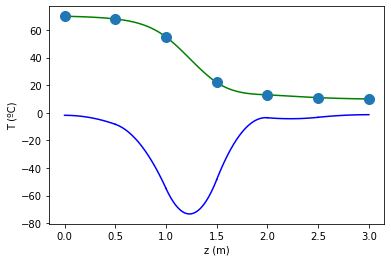

In [73]:
#Crear una matriz con los coeficientes de los polinomios, la transpongo para que queden como filas los polinomios
P=[a,b,c,d]

#Transponer la matriz
fila=len(P[0]) #6
columna=len(P) #4


p=np.zeros([fila,columna])

for i in range(0,fila): #Fijarse lo raro (0:6) pero imprime 0,1,2,3,4,5 !que garompa!
    for j in range(0,columna):
        p[i][j]=P[j][i]
        
print('Los polinomios son')    
print(p)
print('')

# Por que no sirvio usar np.transpose() con P ????????????????



#Vamos a derivar

#p[:,0] columnas
#p[0,:] filas 

# SE VE QUE POR ALGUNA RAZON MISTERIOSA ESTO NO SIRVE
#aux=p
#pdif=aux[0:fila,0:columna-1]  #y hacerlo con copy SI SIRVE

pdif=copy.copy(p[:, :3])

contadorinv=columna
for i in range(0,columna-1):
    contadorinv=contadorinv-1
    pdif[:,i]=contadorinv*pdif[:,i]
    
print('Los polinomios derivados son')
print(pdif)
print('')

#Vamos a graficar el polinomio, la derivada

polderivado=[]
profundidades=[]

for i in range(fila):  #esto imprime 0,1,2,3,4,5
    
    x=np.linspace(z[i],z[i+1],80)
    aux=np.polyval(pdif[i],x-z[i])
    plt.plot(x, np.polyval( p[i] , x-z[i] ),'g' )
    plt.plot(x,aux,'b')
    profundidades.append(x)
    polderivado.append(aux)
    
plt.plot(z,T,'o',ms=10) #ms es el tamaño del punto
plt.xlabel('z (m)')
plt.ylabel('T (ºC)')

print('En verde es spline')
print('En azul la derivada')


In [83]:

# Calculo ahora el minimo

min=np.amin(polderivado)
print('El minimo es:',min)

#Flujo de calor es en ese punto J=-conductividadtermica*(dT/dz) 
flujodecalor=-conductividadtermica*min
print('El flujo de calor es:',flujodecalor,'cal/cm^2')


el minimo es: -73.31269397162684
El flujo de calor es: 0.7331269397162684 cal/cm^2
